In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data organised in folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path=r'./NEU Metal Surface Defects Data' #for desktop

In [ ]:
# # accessing data from colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# folder path
path=r'/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data'

In [ ]:
#exploring folder

In [ ]:
os.listdir(path)

['Thumbs.db', 'train', 'test', 'valid']

In [ ]:
os.listdir(path+'/train')

['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']

In [ ]:
classes_defects=os.listdir(path+'/train')
print(classes_defects)
print(type(classes_defects))

['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']
<class 'list'>


In [ ]:
os.listdir(path+'/train/Patches')[:10]

['Pa_206.bmp',
 'Pa_165.bmp',
 'Pa_145.bmp',
 'Pa_156.bmp',
 'Pa_226.bmp',
 'Pa_243.bmp',
 'Pa_209.bmp',
 'Pa_195.bmp',
 'Pa_131.bmp',
 'Pa_16.bmp']

In [ ]:
from PIL import Image

In [ ]:
img1=Image.open(path+'/train/Patches/Pa_206.bmp')
print(img1.filename)
print(img1.format)
print(img1.mode)
print(img1.size)

# # The "L" mode represents grayscale here.... So it can hold any of 256 shades of Gray 
# (includes black and white as Gray shades).
# # The "P" mode can hold 256 different colors like red,blue, green etc....
# https://stackoverflow.com/questions/52307290/what-is-the-difference-between-images-in-p-and-l-mode-in-pil#:~:text=Examples%3A%208%20bit%20black%20and,are%20%22P%22%20mode..

/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data/train/Patches/Pa_206.bmp
BMP
L
(200, 200)


In [ ]:
image=plt.imread(path+'/train/Patches/Pa_206.bmp')


(200, 200)
max_pixel_value: 255


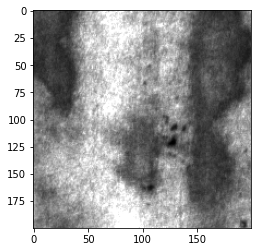

In [ ]:
print(image.shape)
plt.imshow(image,cmap='gray')
print("max_pixel_value: {}".format(image.max()))

In [ ]:
image_height=200
image_width=200
batch_size=16

In [ ]:
#ImageDataGenerator and flow_from_directory for datasets

In [ ]:
# # https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

# https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/TensorFlow/Basics/tutorial18-customdata-images/1_in_subfolders.py

In [ ]:
data_generator=ImageDataGenerator(
    rescale=1.0/255,
    dtype=tf.float32,
    
)

In [ ]:
train_ds=data_generator.flow_from_directory(
    path+'/train',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=batch_size
)

Found 1667 images belonging to 6 classes.


In [ ]:
valid_ds=data_generator.flow_from_directory(
    path+'/valid',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=batch_size
)

Found 72 images belonging to 6 classes.


In [ ]:
test_ds=data_generator.flow_from_directory(
    path+'/test',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=False,
    seed=1,
    batch_size=batch_size
)

Found 72 images belonging to 6 classes.


In [ ]:
# exploring datsets

In [ ]:
import numpy as np

In [ ]:
print(len(train_ds[0]))

2


In [ ]:
print(len(train_ds[0][0]))

16


In [ ]:
print(train_ds[0][0].shape)

(16, 200, 200, 3)


(16, 200, 200, 3)
3.0
['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']
{'Inclusion': 0, 'Patches': 1, 'Crazing': 2, 'Pitted': 3, 'Scratches': 4, 'Rolled': 5}
tf.Tensor([3 0 5 3 0 3 0 5 4 2 0 3 4 3 0 1], shape=(16,), dtype=uint8)
Pitted


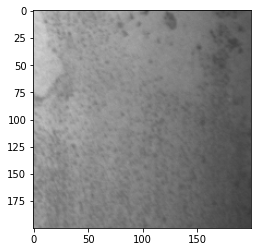

In [ ]:
for images,labels in train_ds:
  plt.imshow(images[0],cmap='gray')
  print(images.shape)
  print(labels[0])
  labels=tf.cast(labels,tf.uint8)
  print(classes_defects)
  print(train_ds.class_indices)
  print((labels))
  print(classes_defects[labels[0]])
  break

In [ ]:
#Pretrained models keras

In [ ]:
# https://keras.io/api/applications/

In [ ]:
# https://towardsdatascience.com/transfer-learning-for-image-classification-using-tensorflow-71c359b56673

# **VGG16 with include_top=False, trainable=false and no augmentation**

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
feature_extractor=VGG16(include_top=False,input_shape=(200,200,3))
feature_extractor.trainable=False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
input_=tf.keras.Input(shape=(200,200,3))
x=feature_extractor(input_,training=False,)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [ ]:
model=keras.Model(input_,output_)

In [ ]:

from numpy.random import seed
seed(1)
tf.random.set_seed(1)

**Callbacks**

In [ ]:
# https://iaminnovativecoder.medium.com/tensorflow-learning-rate-finder-dbb3f56eea4f
#callbacks to find suitable learning rate

In [ ]:
import numpy as np

In [ ]:
np.exp(1)

2.718281828459045

In [ ]:
class LRfind(keras.callbacks.Callback):
  def __init__(self,min_lr,max_lr,n_steps):
    self.min_lr=min_lr
    self.max_lr=max_lr
    self.step_up = (max_lr/min_lr) ** (1 / n_steps)
    self.lrs=[]
    self.losses=[]

  def on_train_begin(self,logs=None):
    self.weights=self.model.get_weights()
    self.model.optimizer.lr=self.min_lr

  def on_train_batch_end(self,batch,logs=None):
    self.lrs.append(self.model.optimizer.lr.numpy())
    self.losses.append(logs["loss"])
    self.model.optimizer.lr=self.model.optimizer.lr*self.step_up

    if self.model.optimizer.lr>self.max_lr:
      self.model.stop_training=True

  def on_train_end(self,logs=None):
    self.model.set_weights(self.weights)


In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
epochs_num=1

In [ ]:
lr_find = LRfind(1e-6, 1e1,105)

In [ ]:
history_callback=model.fit(train_ds,epochs=1, verbose=True,validation_data=valid_ds,callbacks=[lr_find])



105/105 [==============================] - 282s 3s/step - loss: 3.2392 - accuracy: 0.3437 - val_loss: 4.1779 - val_accuracy: 0.1667


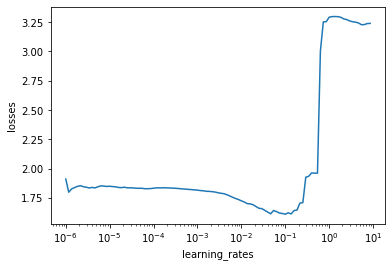

In [ ]:
plt.plot(lr_find.lrs,lr_find.losses)
plt.xscale('log')
plt.xlabel('learning_rates')
plt.ylabel('losses')
plt.show()


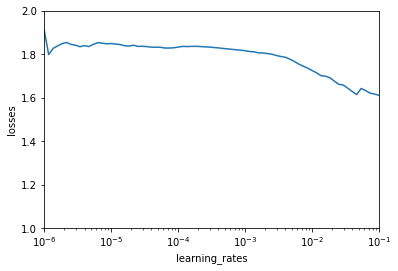

In [ ]:
plt.plot(lr_find.lrs,lr_find.losses)
plt.xscale('log')
plt.xlim(0.000001,0.1)
plt.ylim(1,2)
plt.xlabel('learning_rates')
plt.ylabel('losses')
plt.show()

Text(0, 0.5, 'learning_rate')

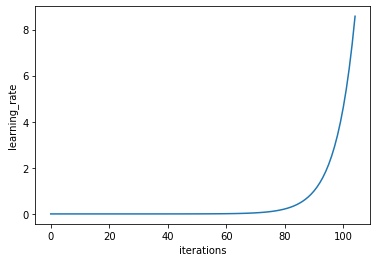

In [ ]:
plt.plot(lr_find.lrs)
plt.xlabel('iterations')
plt.ylabel('learning_rate')

# *LearningRateScheduler *

https://keras.io/api/callbacks/learning_rate_scheduler/

In [ ]:
def scheduler(epoch,lr):
  if epoch<2:
    return lr
  else:
    return lr*tf.math.exp(-0.05)

In [ ]:
np.exp([-0.01,-0.05,-0.1,-0.5])

array([0.99004983, 0.95122942, 0.90483742, 0.60653066])

In [ ]:
lr_scheduler=keras.callbacks.LearningRateScheduler(scheduler,verbose=True)

In [ ]:
model=keras.Model(input_,output_)

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.005),
              metrics=['accuracy'])

In [ ]:
history_callback2=model.fit(train_ds,epochs=20, verbose=True,validation_data=valid_ds,callbacks=[lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.004999999888241291.
Epoch 1/20
105/105 [==============================] - 8s 74ms/step - loss: 0.6078 - accuracy: 0.7792 - val_loss: 0.0901 - val_accuracy: 0.9861 - lr: 0.0050

Epoch 2: LearningRateScheduler setting learning rate to 0.004999999888241291.
Epoch 2/20
105/105 [==============================] - 7s 70ms/step - loss: 0.1917 - accuracy: 0.9334 - val_loss: 0.1243 - val_accuracy: 0.9306 - lr: 0.0050

Epoch 3: LearningRateScheduler setting learning rate to 0.004756147041916847.
Epoch 3/20
105/105 [==============================] - 8s 71ms/step - loss: 0.1089 - accuracy: 0.9688 - val_loss: 0.0354 - val_accuracy: 0.9861 - lr: 0.0048

Epoch 4: LearningRateScheduler setting learning rate to 0.004524187184870243.
Epoch 4/20
105/105 [==============================] - 7s 71ms/step - loss: 0.1006 - accuracy: 0.9616 - val_loss: 0.0163 - val_accuracy: 1.0000 - lr: 0.0045

Epoch 5: LearningRateScheduler setting learning rate to 0.0

In [ ]:
model.evaluate(test_ds)

5/5 [==============================] - 13s 3s/step - loss: 0.0106 - accuracy: 1.0000


[0.010559778660535812, 1.0]

In [ ]:
history_callback2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Text(0, 0.5, 'loss')

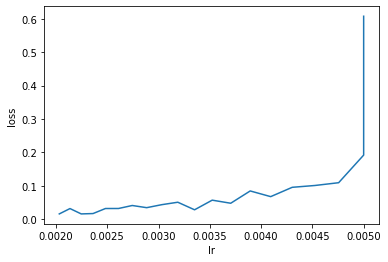

In [ ]:
plt.plot(history_callback2.history['lr'],history_callback2.history['loss'])
plt.xlabel('lr')
plt.ylabel('loss')

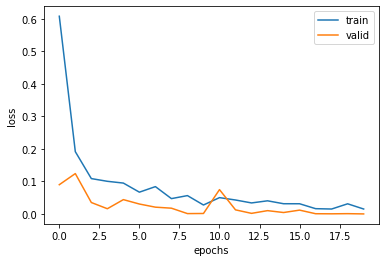

In [ ]:
# plt.plot(history_callback.history['loss']+history_callback2.history['loss'])
# plt.plot(history_callback.history['val_loss']+history_callback2.history['val_loss'])
plt.plot(history_callback2.history['loss'])
plt.plot(history_callback2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

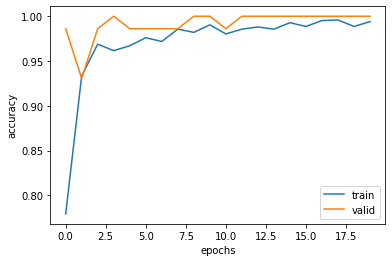

In [ ]:
# plt.plot(history_callback.history['accuracy']+history_callback2.history['accuracy'])
# plt.plot(history_callback.history['val_accuracy']+history_callback2.history['val_accuracy'])
plt.plot(history_callback2.history['accuracy'])
plt.plot(history_callback2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                             

Epoch 1/20
105/105 [==============================] - 330s 3s/step - loss: 1.6962 - accuracy: 0.2621 - val_loss: 1.5763 - val_accuracy: 0.5000
Epoch 2/20
105/105 [==============================] - 8s 72ms/step - loss: 1.4994 - accuracy: 0.6149 - val_loss: 1.3557 - val_accuracy: 0.8889
Epoch 3/20
105/105 [==============================] - 8s 72ms/step - loss: 1.2525 - accuracy: 0.7948 - val_loss: 1.0713 - val_accuracy: 0.8750
Epoch 4/20
105/105 [==============================] - 8s 73ms/step - loss: 0.9825 - accuracy: 0.8254 - val_loss: 0.8035 - val_accuracy: 0.9306
Epoch 5/20
105/105 [==============================] - 8s 73ms/step - loss: 0.7558 - accuracy: 0.8794 - val_loss: 0.5898 - val_accuracy: 0.9583
Epoch 6/20
105/105 [==============================] - 8s 74ms/step - loss: 0.5783 - accuracy: 0.9112 - val_loss: 0.4188 - val_accuracy: 0.9861
Epoch 7/20
105/105 [==============================] - 8s 74ms/step - loss: 0.4471 - accuracy: 0.9250 - val_loss: 0.3186 - val_accuracy: 0.9861

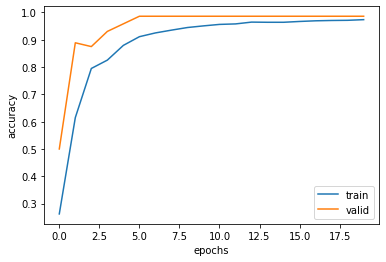

In [ ]:
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

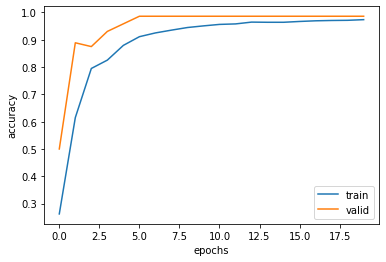

In [ ]:
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

**End of callback**

In [ ]:
model=keras.Model(input_,output_)

In [ ]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                           

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 9s 80ms/step - loss: 0.0273 - accuracy: 0.9922 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 2/50
105/105 [==============================] - 8s 79ms/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3/50
105/105 [==============================] - 8s 80ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 4/50
105/105 [==============================] - 8s 79ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 5/50
105/105 [==============================] - 8s 78ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 6/50
105/105 [==============================] - 8s 78ms/step - loss: 0.0251 - accuracy: 0.9934 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 7/50
105/105 [==============================] - 8s 77ms/step - loss: 0.0249 - accuracy: 0.9934 - val_loss: 0.0055 - val_accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_ds)

5/5 [==============================] - 14s 3s/step - loss: 0.0364 - accuracy: 0.9861


[0.03642109036445618, 0.9861111044883728]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

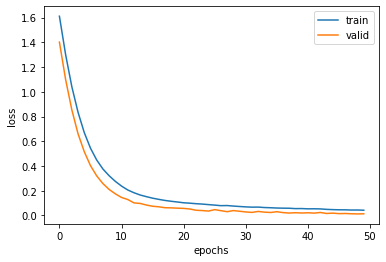

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

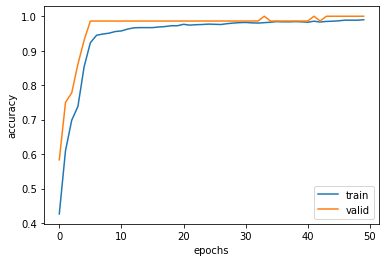

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

# **VGG16 with include_top=False, trainable=false and augmentation**

In [ ]:
feature_extractor2=VGG16(include_top=False,input_shape=(200,200,3))
feature_extractor2.trainable=False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
data_aug2=keras.Sequential([
                           tf.keras.Input(shape=(200,200,3)),
                           #layers.experimental.preprocessing.Resizing(height=224,width=224),
                           layers.experimental.preprocessing.RandomContrast(factor=0.25),
                           layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                           layers.experimental.preprocessing.RandomZoom(0.5,0.6),
                           layers.experimental.preprocessing.RandomRotation(0.5),
                           layers.experimental.preprocessing.RandomTranslation(0.2,0.2),

])

In [ ]:
input_=tf.keras.Input(shape=(200,200,3))
x=data_aug2(input_,training=False)
x=feature_extractor2(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [ ]:
model2=keras.Model(input_,output_)

In [ ]:
print(model2.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                           

In [ ]:
model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [ ]:
history2=model2.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 8s 74ms/step - loss: 1.7256 - accuracy: 0.2388 - val_loss: 1.5649 - val_accuracy: 0.3333
Epoch 2/50
105/105 [==============================] - 8s 72ms/step - loss: 1.4625 - accuracy: 0.4811 - val_loss: 1.2982 - val_accuracy: 0.6528
Epoch 3/50
105/105 [==============================] - 8s 74ms/step - loss: 1.1868 - accuracy: 0.7349 - val_loss: 0.9563 - val_accuracy: 0.8750
Epoch 4/50
105/105 [==============================] - 8s 72ms/step - loss: 0.8838 - accuracy: 0.8530 - val_loss: 0.6568 - val_accuracy: 0.9722
Epoch 5/50
105/105 [==============================] - 8s 74ms/step - loss: 0.6411 - accuracy: 0.9064 - val_loss: 0.4342 - val_accuracy: 0.9861
Epoch 6/50
105/105 [==============================] - 8s 73ms/step - loss: 0.4667 - accuracy: 0.9334 - val_loss: 0.2855 - val_accuracy: 0.9861
Epoch 7/50
105/105 [==============================] - 8s 73ms/step - loss: 0.3571 - accuracy: 0.9340 - val_loss: 0.2103 - val_accuracy: 0.9861

In [ ]:
model2.evaluate(test_ds)

5/5 [==============================] - 0s 74ms/step - loss: 0.0247 - accuracy: 1.0000


[0.024712661281228065, 1.0]

In [ ]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

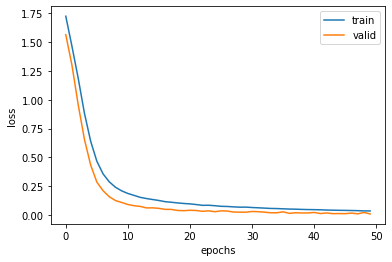

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

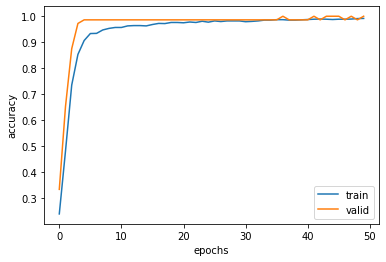

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

# **VGG16 with include_top=True, trainable=True and no augmentation**



In [ ]:
feature_extractor3=VGG16(include_top=True,weights='imagenet',input_shape=(224,224,3))
feature_extractor3.trainable=True

553476096/553467096 [==============================] - 2s 0us/step


In [ ]:
data_aug=keras.Sequential([
                           tf.keras.Input(shape=(200,200,3)),
                           layers.experimental.preprocessing.Resizing(height=224,width=224),
                          #  layers.experimental.preprocessing.RandomContrast(factor=0.25),
                          #  layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                          #  layers.experimental.preprocessing.RandomZoom(0.5,0.6),
                          #  layers.experimental.preprocessing.RandomRotation(0.5),
                          #  layers.experimental.preprocessing.RandomTranslation(0.2,0.2),

])

In [ ]:
input_=tf.keras.Input(shape=(200,200,3))
x=data_aug(input_)
x=feature_extractor3(x)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [ ]:
model3=keras.Model(input_,output_)

In [ ]:
print(model3.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 128)               128128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 6)                 198   

In [ ]:
model3.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [ ]:
history3=model3.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 34s 274ms/step - loss: 1.7906 - accuracy: 0.1824 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 2/50
105/105 [==============================] - 26s 246ms/step - loss: 1.7921 - accuracy: 0.1608 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/50
105/105 [==============================] - 26s 248ms/step - loss: 1.7919 - accuracy: 0.1554 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/50
105/105 [==============================] - 26s 249ms/step - loss: 1.7919 - accuracy: 0.1662 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/50
105/105 [==============================] - 27s 253ms/step - loss: 1.7920 - accuracy: 0.1578 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/50
105/105 [==============================] - 26s 251ms/step - loss: 1.7919 - accuracy: 0.1596 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/50
105/105 [==============================] - 26s 251ms/step - loss: 1.7920 - accuracy: 0.1566 - val_loss: 1.7918 - val_ac

In [ ]:
model3.evaluate(test_ds)

5/5 [==============================] - 0s 80ms/step - loss: 1.7918 - accuracy: 0.1667


[1.791761875152588, 0.1666666716337204]

In [ ]:
history3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

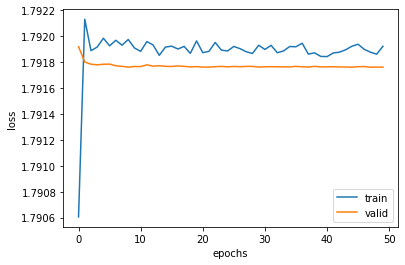

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

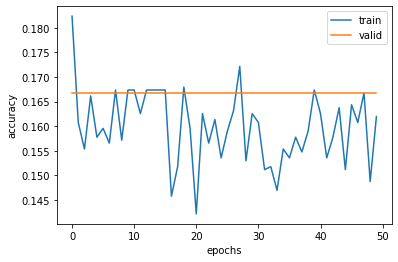

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

**Callback**

In [ ]:
model3.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
lr_find3 = LRfind(1e-6, 1e1,105)

In [ ]:
history_callback=model3.fit(train_ds,epochs=1, verbose=True,validation_data=valid_ds,callbacks=[lr_find3])

105/105 [==============================] - 417s 4s/step - loss: 1.9681 - accuracy: 0.1716 - val_loss: 2.9587 - val_accuracy: 0.1667


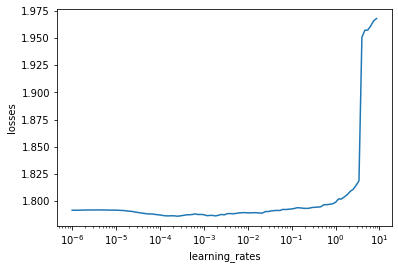

In [ ]:
plt.plot(lr_find3.lrs,lr_find3.losses)
plt.xscale('log')
plt.xlabel('learning_rates')
plt.ylabel('losses')
plt.show()


Text(0, 0.5, 'learning_rate')

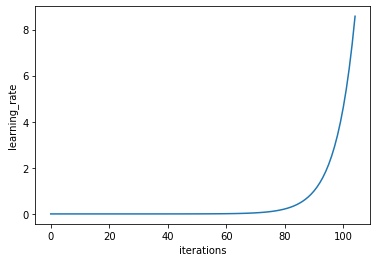

In [ ]:
plt.plot(lr_find3.lrs)
plt.xlabel('iterations')
plt.ylabel('learning_rate')

In [ ]:
def scheduler(epoch,lr):
  if epoch<2:
    return lr
  else:
    return lr*tf.math.exp(-0.05)

In [ ]:
np.exp([-0.01,-0.05,-0.1,-0.5])

array([0.99004983, 0.95122942, 0.90483742, 0.60653066])

In [ ]:
lr_scheduler=keras.callbacks.LearningRateScheduler(scheduler,verbose=True)

In [ ]:
model3.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [ ]:
history_callback2=model3.fit(train_ds,epochs=20, verbose=True,validation_data=valid_ds,callbacks=[lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/20
105/105 [==============================] - 27s 249ms/step - loss: 1.7927 - accuracy: 0.1656 - val_loss: 1.7920 - val_accuracy: 0.1667 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/20
105/105 [==============================] - 27s 252ms/step - loss: 1.7923 - accuracy: 0.1662 - val_loss: 1.7918 - val_accuracy: 0.1667 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.512294491287321e-05.
Epoch 3/20
105/105 [==============================] - 27s 252ms/step - loss: 1.7921 - accuracy: 0.1662 - val_loss: 1.7918 - val_accuracy: 0.1667 - lr: 9.5123e-05

Epoch 4: LearningRateScheduler setting learning rate to 9.048374340636656e-05.
Epoch 4/20
105/105 [==============================] - 26s 250ms/step - loss: 1.7921 - accuracy: 0.1578 - val_loss: 1.7918 - val_accuracy: 0.1667 - lr: 9.0484e-05

Epoch 5: LearningRateScheduler 

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_ds)

In [ ]:
history_callback2.history.keys()

In [ ]:
plt.plot(history_callback2.history['lr'],history_callback2.history['loss'])
plt.xlabel('lr')
plt.ylabel('loss')

In [ ]:
plt.plot(history_callback.history['loss']+history_callback2.history['loss'])
plt.plot(history_callback.history['val_loss']+history_callback2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

In [ ]:
plt.plot(history_callback.history['accuracy']+history_callback2.history['accuracy'])
plt.plot(history_callback.history['val_accuracy']+history_callback2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

# **VGG16 with include_top=True, trainable=True and augmentation** 

In [ ]:
feature_extractor4=VGG16(include_top=True,weights='imagenet',input_shape=(224,224,3))
feature_extractor4.trainable=True

In [ ]:
data_aug=keras.Sequential([
                           tf.keras.Input(shape=(200,200,3)),
                           layers.experimental.preprocessing.Resizing(height=224,width=224),
                           layers.experimental.preprocessing.RandomContrast(factor=0.25),
                           layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                           layers.experimental.preprocessing.RandomZoom(0.5,0.6),
                           layers.experimental.preprocessing.RandomRotation(0.5),
                           layers.experimental.preprocessing.RandomTranslation(0.2,0.2),

])

In [ ]:
input_=tf.keras.Input(shape=(200,200,3))
x=data_aug(input_)
x=feature_extractor4(x,training=True)
#x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [ ]:
model4=keras.Model(input_,output_)

In [ ]:
print(model4.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 sequential_7 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense_32 (Dense)            (None, 128)               128128    
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 6)                 198 

In [ ]:
model4.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.SGD(0.005),
              metrics=['accuracy'])

In [ ]:
history4=model4.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 28s 249ms/step - loss: 1.7917 - accuracy: 0.1578 - val_loss: 1.7909 - val_accuracy: 0.2778
Epoch 2/50
105/105 [==============================] - 27s 254ms/step - loss: 1.7909 - accuracy: 0.2232 - val_loss: 1.7898 - val_accuracy: 0.3333
Epoch 3/50
105/105 [==============================] - 26s 248ms/step - loss: 1.7893 - accuracy: 0.2436 - val_loss: 1.7875 - val_accuracy: 0.3333
Epoch 4/50
105/105 [==============================] - 26s 247ms/step - loss: 1.7867 - accuracy: 0.3239 - val_loss: 1.7846 - val_accuracy: 0.3889
Epoch 5/50
105/105 [==============================] - 26s 250ms/step - loss: 1.7824 - accuracy: 0.3491 - val_loss: 1.7787 - val_accuracy: 0.4028
Epoch 6/50
105/105 [==============================] - 26s 248ms/step - loss: 1.7749 - accuracy: 0.3839 - val_loss: 1.7682 - val_accuracy: 0.3472
Epoch 7/50
105/105 [==============================] - 26s 248ms/step - loss: 1.7620 - accuracy: 0.3755 - val_loss: 1.7553 - val_ac

In [ ]:
model4.evaluate(test_ds)

5/5 [==============================] - 0s 80ms/step - loss: 0.3321 - accuracy: 1.0000


[0.3321087658405304, 1.0]

In [ ]:
history4.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

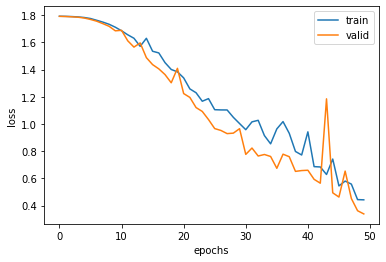

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

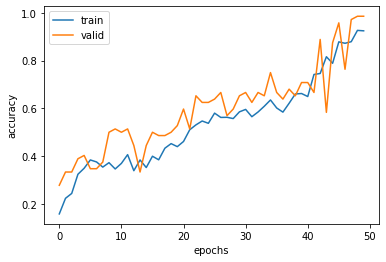

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

In [ ]:
# feature_extractor=ResNet50(weights='imagenet',input_shape=(200,200,3))
# feature_extractor.trainable=True

ValueError: ignored